<div class="alert alert-info">

# PSY 4016 / 6973
# Cueillette et traitement des données en neurosciences cognitives
## Chapitre 6: Stats. Scikit-Learn
<p>
<li>Évaluation statistique:<ul>
    <li>Pandas
    <li>SciPy
    <li>Statsmodels
    <li>Seaborn
<li>Scikit-Learn: Pré-traitement</p>
</div>

<div class="alert alert-info">
<b><h2>Évaluation statistique</h2></b>

In [1]:
import pandas
cerveau_df = pandas.read_csv('https://scipy-lectures.org/_downloads/brain_size.csv', sep=';', na_values='.')

In [11]:
cerveau_df.columns
cerveau_df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


In [3]:
groupby_genre = cerveau_df.groupby('Gender')

In [4]:
# Prendre la moyenne:

groupby_genre.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [13]:
for genre, valeur in groupby_genre['VIQ']:
    print(genre, valeur.mean())

TypeError: cannot unpack non-iterable int object

In [6]:
cerveau_df['FSIQ'].mean()

113.45

array([[<AxesSubplot:xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot:xlabel='Height', ylabel='Weight'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='Weight'>],
       [<AxesSubplot:xlabel='Weight', ylabel='Height'>,
        <AxesSubplot:xlabel='Height', ylabel='Height'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='Height'>],
       [<AxesSubplot:xlabel='Weight', ylabel='MRI_Count'>,
        <AxesSubplot:xlabel='Height', ylabel='MRI_Count'>,
        <AxesSubplot:xlabel='MRI_Count', ylabel='MRI_Count'>]],
      dtype=object)

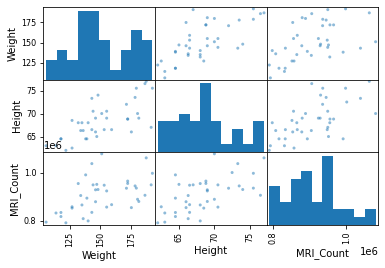

In [15]:
pandas.plotting.scatter_matrix(cerveau_df[['Weight','Height','MRI_Count']])

array([[<AxesSubplot:xlabel='PIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='PIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='PIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='VIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='VIQ'>],
       [<AxesSubplot:xlabel='PIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='VIQ', ylabel='FSIQ'>,
        <AxesSubplot:xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

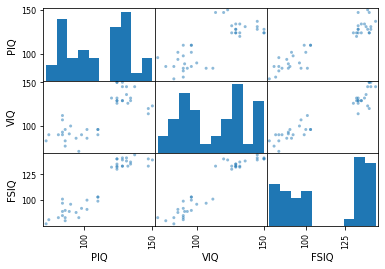

In [16]:
pandas.plotting.scatter_matrix(cerveau_df[['PIQ','VIQ','FSIQ']])

In [24]:
cerveau_df.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [10]:
cerveau_df.pop('Unnamed: 0')

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
Name: Unnamed: 0, dtype: int64

<div class="alert alert-success">
    nous pouvons voir que les métriques de QI sont bimodales, comme il y a deux populations.</div>

<div class="alert alert-warning">
<h3> SciPy </h3></div>

<div class="alert alert-success">
<li> auteur original: <b>Travis Oliphant, Pearu Peterson, Eric Jones</b>
<li> Première version: <b>2001</b>
<li> dernière version: <b>1.6.1, 17 février 2021</b>
<li>https://github.com/scipy/scipy</div>

In [10]:
import scipy
scipy.__version__

# dans le terminal:
 #pip3 install scipy
# pip3 install scipy --upgrade

'1.7.3'

In [11]:
from scipy import stats

<div class="alert alert-success">
    <h4>Test-T, 1 échantillon</h4>
<li> scipy.stats.ttest_1samp()
<li> tester la valeur d'une moyenne de population
<li> pour tester si la moyenne de population des données est susceptible 
d'être égale à une valeur donnée
<li> (techniquement si les observations sont tirées d'une distribution gaussienne
d'une moyenne de population donnée)
<li>Renvoie:<ol>
    <li>la statistique T 
    <li>la valeur de p</ol></div>

In [14]:

stats.ttest_1samp(cerveau_df['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [20]:
res = stats.ttest_1samp(cerveau_df['VIQ'], 0)
print(res.statistic)

30.088099970849328


In [21]:
print(res.pvalue)

1.3289196468728067e-28


<div class="alert alert-info">
Avec une valeur de p de 10 ^ -28, nous pouvons affirmer que la moyenne de la population pour l'IQ (mesure VIQ) n'est pas 0</div>

<div class="alert alert-success">
    <h4>Test-T, 2 échantillon</h4>
<li> scipy.stats.ttest_ind()
<li> tester la différence entre les populations
<li> ttest_1samp a montré que le VIQ moyen dans les populations femmes et hommes était différent
<li> ttest_ind va montrer si cela est significatif
<li>Renvoie:<ol>
    <li>la statistique T 
    <li>la valeur de p</ol></div>

In [1]:
femme_viq = cerveau_df[cerveau_df['Gender'] == 'Female']['VIQ']
homme_viq = cerveau_df[cerveau_df['Gender'] == 'Male']['VIQ']

NameError: name 'cerveau_df' is not defined

In [24]:
femme_viq


0     132
4     132
5      90
6     136
7      90
10    129
13    120
14    100
15     71
16    132
18    112
22    129
24     86
26     90
28     83
29    126
30    126
34     90
35    129
37     86
Name: VIQ, dtype: int64

In [26]:
stats.ttest_ind(femme_viq, homme_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [27]:
res = stats.ttest_ind(femme_viq, homme_viq)
print(res.statistic, res.pvalue)

-0.7726161723275011 0.44452876778583217


<div class="alert alert-success">
    <h4>Tests appariés: mesures répétées sur les mêmes individus</h4>
<li> scipy.stats.ttest_ind()
<li> PIQ, VIQ et FSIQ donnent 3 mesures de QI
<li> pour tester si FISQ et PIQ sont significativement différents, il faudrait faire un test à 2 échantillons:
<li>Renvoie:<ol>
    <li>la statistique T 
    <li>la valeur de p</ol></div>

In [28]:
stats.ttest_ind(cerveau_df['FSIQ'], cerveau_df['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

<div class="alert alert-success">
    <h4>Tests appariés: mesures répétées sur les mêmes individus</h4>
<li> scipy.stats.ttest_rel()
<ul><li>les observations: FSIQ et PIQ sont mesurés sur les mêmes individus
    <li> c'est un problème, parce que il existe des liens entre les deux variables
<li>la variance due à la variabilité inter-sujets est source de confusion
<li> cette variance peut être supprimée à l'aide d'un «test apparié» </ul>
<li>Renvoie:<ol>
    <li>la statistique T 
    <li>la valeur de p</ol></div>

In [29]:
stats.ttest_rel(cerveau_df['FSIQ'], cerveau_df['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [30]:
# mais dans cette exemple, cela équivaut à un test à 1 échantillon sur la différence

stats.ttest_1samp(cerveau_df['FSIQ'] - cerveau_df['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

<div class="alert alert-success">
    <h4>Test de rang signé</h4>
<ul>
    <li> apparié: scipy.stats.wilcoxon() <b>Wilcoxon</b>
    <li> non-apparié: scipy.stats.mannwhitneyu() <b>Mann-Whitney</b></ul>

<ul><li>Les tests T supposent des erreurs gaussiennes
    <li>le test de rang signé de Wilcoxon, peut assouplir cette hypothèse</ul>
<li>Renvoie:<ol>
    <li>la statistique T 
    <li>la valeur de p</ol></div>

In [28]:
stats.wilcoxon(cerveau_df['FSIQ'], cerveau_df['PIQ'])

<div class="alert alert-info">
Comment pouvons-nous effectuer une analyse statistique plus complexe:
<ul>
<li>Modèles linéaires, facteurs multiples et analyse de variance?
<li>Une régression linéaire simple?
<li>Étant donné deux ensembles d'observations, x et y, comment tester l'hypothèse que y est une fonction linéaire de x?</ul></div>

<div class="alert alert-warning">
<h3> statsmodels </h3></div>

<div class="alert alert-success">
<li> auteur original: <b>Jonathan Taylor</b>
<li> Première version: <b>2009</b>
<li> dernière version: <b>0.12.2</b>, 2 février 2021
<li> construit sur la base de NumPy, SciPy, Pandas, Matplotlib
<li>https://www.statsmodels.org/stable/index.html</div>

In [32]:
import statsmodels
statsmodels.__version__

'0.13.2'

In [33]:
from statsmodels.formula.api import ols #Ordinary Least Squares

# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
    
# ols("y ~ x", pandas.DataFrame).fit()

In [34]:
model = ols("FSIQ ~ PIQ", cerveau_df).fit()

In [35]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   FSIQ   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     260.2
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.37e-18
Time:                        09:30:40   Log-Likelihood:                -142.30
No. Observations:                  40   AIC:                             288.6
Df Residuals:                      38   BIC:                             292.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3034      7.026      0.328      0.7

<div class="alert alert-success">
<li>Statsmodels utilise une terminologie statistique:
<li>la variable y dans les modèles statistiques est appelée «endogène»: la valeur que vous essayez de prédire

<li>la variable x est appelée exogène: représente les fonctionnalités que vous utilisez pour effectuer la prédiction

<li>en détail ici: http://www.statsmodels.org/devel/endog_exog.html</div>

In [36]:
cerveau_df.Gender

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object

In [37]:
"""Variables catégorielles: 
comparaison de groupes ou de plusieurs catégories

Nous pouvons écrire une comparaison entre 
le QI des hommes et des femmes 
en utilisant un modèle linéaire:
"""

# Intercept: nous pouvons supprimer l'interception 
# en utilisant - 1 dans la formule,
# ou forcer l'utilisation d'une interception en utilisant + 1.

model = ols("VIQ ~ Gender + 1", cerveau_df).fit()

# le «genre» est automatiquement détecté comme une variable catégorielle,
# et donc chacune de ses différentes valeurs est traitée
# comme des entités différentes.

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Tue, 15 Feb 2022   Prob (F-statistic):              0.445
Time:                        09:31:25   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [38]:
# Une colonne entière peut être forcée d'être traitée 
# comme catégorique en utilisant la lettre c devant

model = ols("VIQ ~ C(Gender)", cerveau_df).fit()

<div class="alert alert-success">
<li>Par défaut, les modèles statistiques traitent une variable catégorielle avec K valeurs possibles comme K-1 variables booléennes «factices» (le dernier niveau étant absorbé dans le terme d'interception). <li>C'est presque toujours un bon choix par défaut - cependant, il est possible de spécifier différents encodages pour les variables catégorielles (http://statsmodels.sourceforge.net/devel/contrasts.html)</div>

In [ ]:
"""Régression multiple: incluant plusieurs facteurs
"""

In [39]:
iris = pandas.read_csv("https://scipy-lectures.org/_downloads/iris.csv")

In [40]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'name'], dtype='object')

In [41]:
iris.name.tolist()

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',


In [ ]:
"""
La taille des sépales et des pétales a tendance à être liée:
les fleurs plus grosses ont des pétales plus grosses!
Mais y a-t-il en plus un effet systématique des espèces?"""

In [42]:
model = ols('sepal_width ~ name + petal_length', iris).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.58e-20
Time:                        09:36:35   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

<div class="alert alert-success">
<h4>Test d'hypothèse post-hoc: analyse de variance (ANOVA)</h4><p>

<li>nous souhaitons tester:<ol>
    <li>si la LONGueur des PÉTales est différente entre:<ul>
        <li>le versicolor et
        <li>le virginica</ul>
    <li>après avoir supprimé l'effet de la LARGeur des SÉPales.</ol>

<li>Cela peut être formulé comme:<ol>
    <li>testant la différence entre le coefficient associé au:<ul>
        <li>versicolor et au
        <li>virginica</ul>
    <li>dans le modèle linéaire estimé</ol>
<li>il s'agit d'une analyse de variance, ANOVA</div>

In [ ]:
model2 = ols('sepal_width ~ name + petal_length', iris).fit()

In [43]:
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.f_test.html
# model = ols('sepal_width ~ name + petal_length', iris).fit()

model.params

Intercept             2.981274
name[T.versicolor]   -1.482075
name[T.virginica]    -1.663492
petal_length          0.298310
dtype: float64

<div class="alert alert-success">
<li>Pour cela, nous écrivons un vecteur de «contraste» sur les paramètres estimés: nous voulons tester «T.versicolor - T.virginica», avec un test F:</div>

In [44]:
##1 et -1 est le contraste entre les deux groupes
print(model.f_test([0, 1, -1, 0]))

<F test: F=3.245335346574197, p=0.07369058781701113, df_denom=146, df_num=1>


In [45]:
"""Tester les interactions"""

'Tester les interactions'

In [46]:
#import urllib
import urllib.request

urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

salaire = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None, names=['education', 'gender', 'wage'],
                       usecols=[0, 2, 5], engine='python'
                       )

In [47]:
salaire.columns

Index(['education', 'gender', 'wage'], dtype='object')

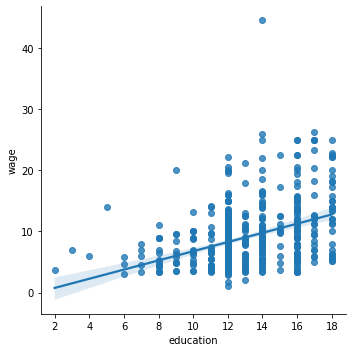

In [50]:
import seaborn as sns

# sns.lmplot permet de tracer une régression univariée
# voici une régression saisissant la relation entre une 
# variable et une autre, par exemple le salaire et l'éducation

sns.lmplot(y='wage', x='education', data=salaire)

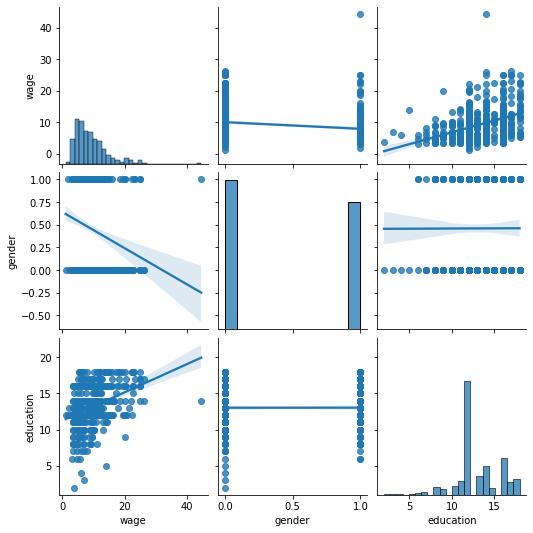

In [54]:
""" mais nous pouvons également regarder les interactions 
entre les variables continues en utilisant 
seaborn.pairplot ()
pour afficher une matrice de dispersion:"""

sns.pairplot(salaire, vars=['wage', 'gender', 'education'], kind='reg')

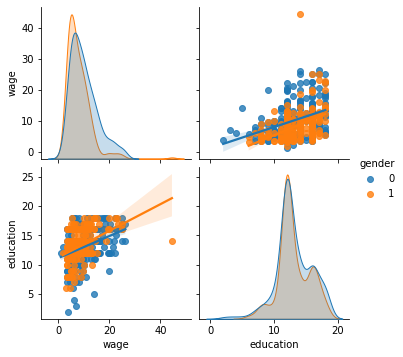

In [56]:
# Les variables catégorielles peuvent être tracées comme teinte:

sns.pairplot(salaire, vars=['wage', 'education'],
                  kind='reg', hue='gender')

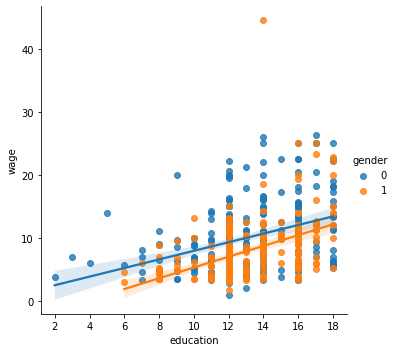

In [52]:
sns.lmplot(y='wage', x='education', hue='gender', data=salaire)

<div class="alert alert-success">
<li>Les salaires augmentent-ils davantage avec l'éducation des hommes que des femmes?

<li>L'intrigue ci-dessus est composée de deux ajustements différents. Nous devons formuler un modèle unique qui teste la variance de la pente entre les deux populations. Cela se fait via une «interaction».</div>

In [57]:
print(ols('wage ~ education + gender',
                data=salaire).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     61.62
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           8.63e-25
Time:                        10:21:11   Log-Likelihood:                -1575.6
No. Observations:                 534   AIC:                             3157.
Df Residuals:                     531   BIC:                             3170.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2178      1.036      0.210      0.8

<div class="alert alert-success">
les résultats ci-dessus soulignent qu'il y a une compensation différente des salaires par education et par genre</div>

In [56]:
model_anova = ols(formula='wage ~ education + gender + education * gender',
                data=salaire).fit()

print(model_anova.summary())

In [57]:
model_anova.pvalues.loc['education:gender']

<div class="alert alert-success">
Pouvons-nous conclure que l'éducation profite plus aux hommes qu'aux femmes?

<li>la valeur de p de l'interaction entre le sexe et l'éducation
<li>education:gender
<li>ne soutiennent pas l'hypothèse selon laquelle l'éducation profite davantage aux hommes qu'aux femmes (valeur de p> 0,05)
</div>

<div class="alert alert-info">

<b><h2>Scikit-Learn</h2></b>

<div class="alert alert-success">
<li> auteur original: <b>David Cournapeau</b>
<li> Première version: <b>Juin 2007</b>
<li> dernière version: <b>0.24.1</b>, janvier 2021
<li> noyau: a été initialement développé comme une extension de SciPy
<li> Leadership actuel (INRIA - Institut national de recherche en informatique et en automatique, Rocquencourt, France)
    <ol>
        <li><b>Fabian Pedregosa</b><li><b>Gael Varoquaux</b><li><b>Alexandre Gramfort</b><li><b>Vincent Michel</b> </ol></div>

<div class="alert alert-success">
<h3>Prétraitement des données</h3>
    <ul>
        <li>les données nécessitent plusieurs étapes d'ajustements avant de pouvoir être analysées.
        <li>ces étapes sont généralement appelées - prétraitement.
        <li>certaines des étapes courantes de prétraitement sont:<ol>
            <li>encodage d'étiquette
            <li>normalisation des données (mise à l'échelle)
            <li>imputation des valeurs manquantes</ol>
        <li>pour cela nous pouvons utiliser le module: <b>sklearn.preprocessing</b> et <b>sklearn.impute</b></ul>
</div>

In [58]:
# code écrit pour sklearn.__version__ == 0.24.1

import sklearn
sklearn.__version__

'1.0.2'

<div class="alert alert-warning">
<h3> encodage/ binarisation d'étiquette </h3></div>

In [59]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [60]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
iris.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [62]:
from sklearn import preprocessing

<div class="alert alert-success">
    <h5>sklearn.preprocessing.LabelEncoder()</h5>
<li>permet d'encodez les étiquettes cibles avec une valeur comprise entre 0 et n_classes-1
<li>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html</div>

In [63]:
# LabelEncoder est une classe,
# pour l'utiliser, il est plus facile de l'instancier.

le = preprocessing.LabelEncoder()

In [64]:
# Initialement, les données doivent être adaptées au codeur d'étiquettes.

le.fit(iris.species)

LabelEncoder()

In [65]:
# après cela, les étiquettes peuvent être transformées en codage normalisé.

le.transform(iris.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
# Alternativement, les étiquettes peuvent être ajustées à l'encodeur et transformées avec une seule commande. 

le.fit_transform(iris.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<div class="alert alert-warning">
<h3> normalisation des données </h3></div>

<div class="alert alert-success">
<h4>Importance de la mise à l'échelle des fonctionnalités </h4>
<li> Normalisation = redimensionnement des entités de sorte qu'elles aient les propriétés d'une <b>distribution normale standard</b> avec une <b>moyenne de zéro et un écart type de un</b>

<li> La mise à l'échelle des fonctionnalités (normalisation du score Z) peut être importante ou même requise pour de nombreux algorithmes AA (tels que PCA, SVM, KNN et régression logistique)
<li>la normalisation permet la suppression des valeurs aberrantes.
</div>

<div class="alert alert-success">
<h4>Exemples d'algorithmes de transformation linéaire gaussienne</h4>
    <li>sklearn.preprocessing.StandardScaler()
    <li>sklearn.preprocessing.RobustScaler()
    <li>pour plus d'informations sur la normalisation et la comparaison des échelles:
    <li> https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
</div>

In [76]:
scaler = sklearn.preprocessing.StandardScaler()

In [68]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [69]:
X_data = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
scaled = scaler.fit(X_data)

In [70]:
scaled.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [77]:
transformed = scaler.transform(X_data)
#transformed

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [78]:
# to scale only one column:

import numpy as np
x_one = iris.sepal_length.to_numpy()
x_one = x_one[:, np.newaxis]
scaled_one = scaler.fit(x_one)

<div class="alert alert-success">
<li>Si les données contiennent de nombreuses valeurs aberrantes, la mise à l'échelle à l'aide de la moyenne et de la variance des données ne fonctionnera probablement pas très bien
<li>Dans ces cas, RobustScaler utilise des estimations plus robustes pour le centre et la plage de vos données.
</div>

<div class="alert alert-success">
<h4>Exemples d'algorithmes de transformation non-linéaire non-gaussienne</h4>
    <li>sklearn.preprocessing.QuantileTransformer()
    <li>sklearn.preprocessing.PowerTransformer()
    <li>les deux algorithm sont basées sur des transformations monotones des entités (ligne ou colonnes) et maintienent le rang des valeurs le long de chaque entité
    <li>cependant, le QuantileTransformer() déforme les corrélations et les distances à l'intérieur et entre les entités.
    <li>Les PowerTransformer est une famille de transformations paramétriques qui visent à mapper les données de n'importe quelle distribution à une distribution gaussienne aussi proche que possible.
</div>

In [73]:
scaler = sklearn.preprocessing.QuantileTransformer()

X_iris = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
X_scaled = scaler.fit_transform(X_iris)
X_scaled

C:\Users\Dylan\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(


array([[0.24161074, 0.8557047 , 0.11409396, 0.12751678],
       [0.12416107, 0.46644295, 0.11409396, 0.12751678],
       [0.06375839, 0.67114094, 0.04697987, 0.12751678],
       [0.04362416, 0.59060403, 0.20134228, 0.12751678],
       [0.17785235, 0.88926174, 0.11409396, 0.12751678],
       [0.32550336, 0.96979866, 0.30536913, 0.29530201],
       [0.04362416, 0.79530201, 0.11409396, 0.24832215],
       [0.17785235, 0.79530201, 0.20134228, 0.12751678],
       [0.01342282, 0.34563758, 0.11409396, 0.12751678],
       [0.12416107, 0.59060403, 0.20134228, 0.        ],
       [0.32550336, 0.90939597, 0.20134228, 0.12751678],
       [0.08724832, 0.79530201, 0.26845638, 0.12751678],
       [0.08724832, 0.46644295, 0.11409396, 0.        ],
       [0.        , 0.46644295, 0.00671141, 0.        ],
       [0.51006711, 0.97986577, 0.01677852, 0.12751678],
       [0.45973154, 1.        , 0.20134228, 0.29530201],
       [0.32550336, 0.96979866, 0.04697987, 0.29530201],
       [0.24161074, 0.8557047 ,

In [80]:
import numpy as np

In [81]:
X_iris_arr = X_iris.to_numpy()

print(np.percentile(X_iris_arr[:, 0], [0, 25, 50, 75, 100]))
print(np.percentile(  X_scaled[:, 0], [0, 25, 50, 75, 100]))

# Une fois la QuantileTransformer appliquée,
# ces repères se rapprochent étroitement des centiles précédemment définis

[4.3 5.1 5.8 6.4 7.9]
[0.         0.24161074 0.51006711 0.74496644 1.        ]


<div class="alert alert-warning">
<h3> Imputation des valeurs manquantes </h3></div>

<div class="alert alert-success">
<li>scikit-learn suppose que toutes les valeurs sont numériques et ont toutes une signification. Les données manquantes sont incompatibles avec scikit-learn.

<li> de nombreux ensembles de données du monde réel contiennent des valeurs manquantes, souvent codées sous forme de blancs, de NaN ou d'autres espaces réservés.

<li> Lorsque des données sont manquantes, une stratégie de base consiste à supprimer des lignes entières et / ou des colonnes contenant des valeurs manquantes.

<li> Une meilleure stratégie consiste à imputer les valeurs manquantes, c'est-à-dire à les déduire de la partie connue des données.
<li>https://scikit-learn.org/stable/modules/impute.html
</div>

<div class="alert alert-success">
<h4>L'algorithme d'imputation univarié: sklearn.impute.SimpleImputer</h4>
<li>impute des valeurs dans la n-ième dimension d'entité (ligne, colonne)
<li>en utilisant uniquement les valeurs non manquantes dans cette dimension d'entité (ligne, colonne)
</div>

In [82]:
from sklearn import impute

In [90]:
##pour les valeurs manquante selon np.nan et va les modif pour a moyenne de ce groupe
imp = impute.SimpleImputer(missing_values = np.nan, strategy = "mean")

#median, most_frequent, constant

In [91]:
cerveau_df = pandas.read_csv('https://scipy-lectures.org/_downloads/brain_size.csv', sep=';', na_values='.')

In [92]:
# y a-t-il des valeurs manquantes?

cerveau_df.Height.isnull().any(), cerveau_df.Weight.isnull().any()

(True, True)

In [93]:
# trouvons l'index de la colonne avec des données manquantes
X_data = cerveau_df[["Weight", "Height"]]

#prend l'index des valeur true qu'on a [isnull] et on le met en liste
ix = X_data.Height[X_data.Height.isnull()].index.tolist()[0]
X_data.iloc[ix]

Weight   NaN
Height   NaN
Name: 20, dtype: float64

In [100]:
##ici dès qu'on appelle le  imp, on a dèjà dàfini plus haut qu'on voulait remplacer par la moyenne
imp.fit(X_data)


SimpleImputer(strategy='most_frequent')

In [102]:
X_new = imp.transform(X_data)

In [104]:
# Attention! les données résultantes sont au format numpy

X_new[ix]

array([118. ,  64.5])

In [99]:
# Changeons pour la valeur la plus fréquente. 

imp = sklearn.impute.SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
imp.fit(X_data)
X_new = imp.transform(X_data)
X_new[ix]

array([118. ,  64.5])

<div class="alert alert-danger">
<b>les commandes et codes à apprendre par cœur </b></div>

In [ ]:
PANDAS:
    pandas.read_csv(filepath, sep=<object>, header=None, 
                    names=['col1', 'col2'], usecols=[0, 2, 5],
                    skiprows=27, skipfooter=6, na_values='.'
                       ) # sep = ';', sep = None, na_values = None
SCIPY:
    scipy.stats.ttest_1samp(pandas.DataFrame['col_y'], 0)
    scipy.stats.ttest_ind(pandas.DataFrame['col_y'], pandas.DataFrame['col_x'])
    scipy.stats.ttest_rel(pandas.DataFrame['col_y'], pandas.DataFrame['col_x'])
    scipy.stats.wilcoxon(pandas.DataFrame['col_y'], pandas.DataFrame['col_x'])
    
STATSMODELS:
    from statsmodels.formula.api import ols #Ordinary Least Squares    
    ols("col_y ~ col_x", pandas.DataFrame).fit()
    ols("col_y ~ col_group + 1", pandas.DataFrame).fit()
    ols("col_y ~ C(col_group)", pandas.DataFrame).fit()
    model = ols('col_y ~ col_group + col_x', pandas.DataFrame).fit()
        model.rsquared_adj
        model.fvalue
        model.f_pvalue
        model.params
        model.tvalues
        model.pvalues
        model.pvalues[0]
        model.pvalues["Intercept"]
        model.pvalues.loc['Intercept']
        model.f_test([0, 1, -1, 0]))
    
SKLEARN:
    sklearn.preprocessing.LabelEncoder()
        fit_transform(pandas.DataFrame['col_y'])
    sklearn.preprocessing.StandardScaler()
        fit(pandas.DataFrame['col_x1', 'col_x2'])
        transform(pandas.DataFrame['col_x1', 'col_x2'])
        
        one_feat = pandas.DataFrame['col_x1'].to_numpy()
        one_feat = one_feat[:, np.newaxis]
        fit(one_feat)
        transform(one_feat)        
    sklearn.preprocessing.QuantileTransformer()
        fit_transform(pandas.DataFrame)
    sklearn.impute.SimpleImputer(missing_values = np.nan, strategy = "mean")
            # strategy = median, most_frequent, constant
        fit(pandas.DataFrame)
        transform(pandas.DataFrame)

<div class="alert alert-danger">
<h4>Exercices</h4><p>
</div>

In [18]:
import seaborn as sns
import numpy as np
planets = sns.load_dataset('planets')
planets.columns


Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [8]:
X_planets['mass'][1]


2.21

In [58]:
import pandas as pd

In [66]:
##boucle qui retourne les index des valeur nan ou manquante d'une col, ici la col 'mass'

X_planets = planets[["orbital_period", "mass", "distance"]]
df_na_bool = []
for index in range(0,len(X_planets.mass)) :
    valeur = X_planets['mass'][index]
    bool = np.isnan(valeur)
    df_na_bool.append(bool)
   
##stock dans na_index une list qui contient les index où df_na_bool avait des True pour les nan
##entre [ i for i...] renvoit seulement l'index de chaque True
na_index = pd.DataFrame([i for i, x in enumerate(df_na_bool) if x]) 
print(na_index) ##ou .size
##il y a donc 522 nan dans la colonne mass

        0
0       7
1      20
2      25
3      26
4      29
..    ...
517  1030
518  1031
519  1032
520  1033
521  1034

[522 rows x 1 columns]


In [9]:
X_planets = planets[["orbital_period", "mass", "distance"]]

for index in range(0,len(X_planets.mass)) :
    valeur = X_planets['mass'][index]
    print('oui', valeur)


oui 7.1
oui 2.21
oui 2.6
oui 19.4
oui 10.5
oui 4.8
oui 4.64
oui nan
oui 10.3
oui 1.99
oui 0.86
oui 9.88
oui 3.88
oui 2.53
oui 0.54
oui 1.64
oui 0.472
oui 0.8
oui 0.165
oui 3.53
oui nan
oui 0.172
oui 0.016
oui 0.057
oui 0.072
oui nan
oui nan
oui 5.3
oui 3.2
oui nan
oui nan
oui nan
oui 6.05
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui 4.2
oui nan
oui nan
oui 1.8
oui 0.0036
oui nan
oui 1.55
oui nan
oui 7.6
oui 8.78
oui 1.85
oui nan
oui nan
oui 2.8
oui nan
oui nan
oui 1.7
oui nan
oui nan
oui 1.04
oui 3.9
oui 20.6
oui 0.6876
oui 1.981
oui 4.132
oui 1.059
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui 5.1
oui 10.6
oui nan
oui 0.045
oui 0.33
oui 0.027
oui 0.17
oui 1.47
oui 1.11
oui 21.42
oui 12.47
oui nan
oui 0.91
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui nan
oui 3.91
oui 0.035
oui 0.024
ou

<div class="alert alert-info">
<li> quelles autres méthodes du cours précédent, savez-vous qui peuvent être utilisées pour saisir les valeurs de manquantes.
<li> essayez d'utiliser la ou les méthodes précédentes afin d'obtenir les mêmes résultats que l'algorithme SimpleImputer
</div>

<div class="alert alert-info">
<li>cadre de données cerveau: cerveau_df = pandas.read_csv('https://scipy-lectures.org/_downloads/brain_size.csv', sep=';', na_values='.')
<li> Testez la différence entre les poids des hommes et des femmes.
<li> Utilisez des statistiques non paramétriques pour tester la différence entre le VIQ chez les hommes et les femmes.
<li>créer le modèle à l'aide de statsmodels
<li> Récupérez les paramètres estimés du modèle.
<li>Astuce: utilisez la saisie TAB, semi-automatique pour trouver l'attribut pertinent.
</div>